In [1]:
from __future__ import print_function

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16
from keras import applications
import cv2 
from os import listdir
import numpy as np
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D
from keras.models import Model

In [2]:
# image specification
img_rows,img_cols= 160, 160

x_tr = []
lable=[]
x_count = []

In [3]:
import os
cou=0
cou2=0
listing = os.listdir('dataset1/') #main dataset directory name
for vid in listing:
    cou2 +=1
    listing2 = os.listdir('dataset1/'+vid)
    for vid2 in listing2:
        cou +=1
nb_classes = cou2
print(cou2,cou)

11 21783


In [4]:
counter =0
listing = os.listdir('dataset1/') #main dataset directory name
for vid in listing:
    print(vid)
    counter2=0
    listing2 = os.listdir('dataset1/'+vid)
    for vid2 in listing2:
        img_array = cv2.imread('dataset1/'+vid+'/'+vid2)  # convert to array
        image = cv2.resize(img_array,(img_rows,img_cols))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        x_tr.append(image)
        lable.append(counter)
        counter2 +=1
        if counter2 >=1000:
            break
    counter +=1
    x_count.append([counter,int(vid)])

1
10
11
2
3
4
5
6
7
8
9


In [5]:
print(len(lable))

11000


In [6]:
print(x_tr[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [7]:
train_data = np.asarray(x_tr)
train_label = np.asarray(lable)

In [8]:
print(train_data[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [9]:
print(train_data.shape)

(11000, 160, 160, 3)


In [10]:
x_train = train_data.reshape(train_data.shape[0], img_rows, img_cols, 3)
y_train = np_utils.to_categorical(train_label, nb_classes)



In [11]:
# Split the data
from sklearn.model_selection import train_test_split
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

In [12]:
print(X_val_new.shape)

(2200, 160, 160, 3)


In [13]:
resnet_model = applications.resnet50.ResNet50(weights='imagenet',
                               include_top=False,
                               input_shape=(img_rows,img_cols, 3))


x = resnet_model.output

x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(nb_classes, activation='softmax')(x)

custom_model = Model(resnet_model.input, x)

for layer in custom_model.layers[:7]:
    layer.trainable = False

custom_model.compile(loss='binary_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2)

datagen.fit(X_train_new)

In [14]:
hist = custom_model.fit_generator(datagen.flow(X_train_new, y_train_new, batch_size=32),
                    steps_per_epoch=len(X_train_new)/32, verbose=1,epochs=50,validation_data=(X_val_new,y_val_new))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
275/275 [==============================] - 3504s 13s/step - loss: 0.2240 - accuracy: 0.4202 - val_loss: 0.3545 - val_accuracy: 0.1082
Epoch 2/50
275/275 [==============================] - 3347s 12s/step - loss: 0.1556 - accuracy: 0.6318 - val_loss: 0.3098 - val_accuracy: 0.0986
Epoch 3/50
 15/275 [>.............................] - ETA: 44:24 - loss: 0.1461 - accuracy: 0.6896

KeyboardInterrupt: 

In [ ]:
custom_model.summary()

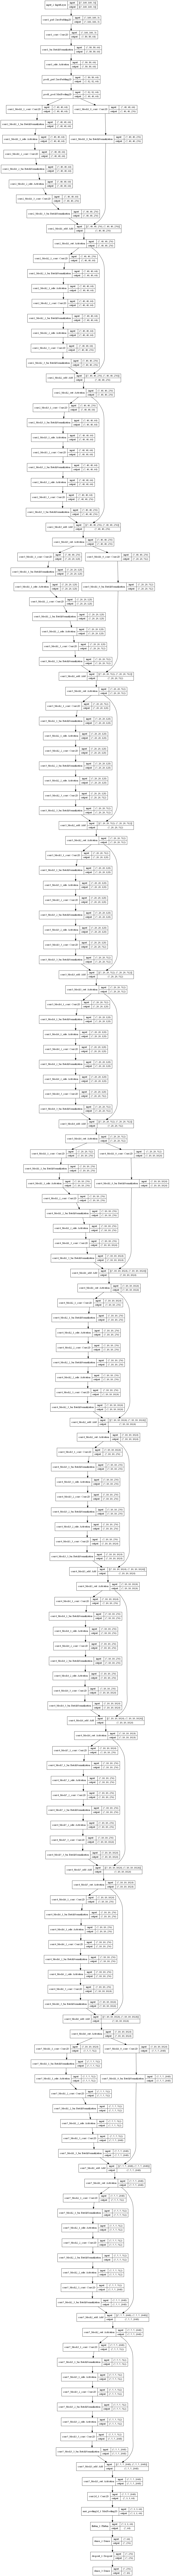

In [22]:
# example of a convolutional neural network
from keras.utils import plot_model
from keras.models import Model



from IPython.display import Image 

plot_model(custom_model, show_shapes=True, show_layer_names=True, to_file='model.png')